# Analyse des résultats de l'élève au prétest
Voici un script permettant de faire un état des lieux du niveau de l'élève en fonction de ses résultats au prétest. Ces résultats serviront à définir les poids initiaux associés à chaque catégorie d'apprentissage dans le script PCBS_apprendre_a_calculer.py .

In [1]:
with open('donnees_eleve.txt', 'r') as mon_fichier:
    lignes=mon_fichier.readlines()

don_eleve=[]

for ligne in lignes:
   ligne = ligne.replace("\n", "")
   donnees = ligne.split('\t')
   don_eleve.append(donnees)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

numexo=0
typeitem=1
corexo=2
repeleve=3
strategie=4
nb_exos=len(don_eleve)

for exo in range(nb_exos):
    don_eleve[exo][corexo]=int(don_eleve[exo][corexo])
    don_eleve[exo][repeleve]=int(don_eleve[exo][repeleve])
    
print(don_eleve)

[['Exercice1', 'Langage', 7, 7, 'A'], ['Exercice2', 'Classique', 4, 4, 'S'], ['Exercice3', 'Classique', 8, 8, 'A'], ['Exercice4', 'Classique', 18, 19, 'S'], ['Exercice5', 'Classique', 21, 23, 'N'], ['Exercice6', 'Incongruent', 3, 7, 'A'], ['Exercice7', 'Incongruent', 23, 23, 'A'], ['Exercice8', 'Incongruent', 7, 7, 'Autre'], ['Exercice9', 'Incongruent', 4, 4, 'N'], ['Exercice10', 'Incongruent', 18, 18, 'Autre']]


## Calcul du nombre d'items dans chaque catégorie

In [8]:
nb_exo_par_cat=[0]*4
nb_exo_par_cat[0]=nb_exos

for exo in range(len(don_eleve)):
    if don_eleve[exo][typeitem]=='Langage':  
        nb_exo_par_cat[1]+=1
    elif don_eleve[exo][typeitem]=='Classique':
        nb_exo_par_cat[2]+=1
    elif don_eleve[exo][typeitem]=='Incongruent':
        nb_exo_par_cat[3]+=1

## Calcul des scores

In [9]:
score_global=0
score_langage=0
score_classique=0
score_incongruent=0

for exo in range(len(don_eleve)):
    if don_eleve[exo][repeleve]==don_eleve[exo][corexo]:
        score_global+=1
        
        if don_eleve[exo][typeitem]=='Langage':  #comment faire pour enlever l'espace après??
            score_langage+=1
        elif don_eleve[exo][typeitem]=='Classique':
            score_classique+=1
        elif don_eleve[exo][typeitem]=='Incongruent':
            score_incongruent+=1
            

Affichage graphique

Text(0.5,1,"Résultats en fonction de la catégorie de l'item")

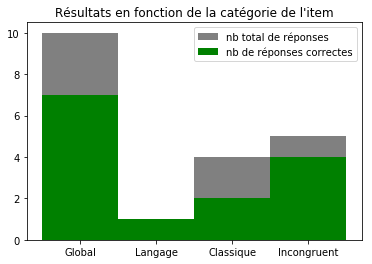

In [10]:
items=['Global','Langage','Classique','Incongruent']
scores=[score_global,score_langage, score_classique, score_incongruent]
width=1
b1=plt.bar(items, nb_exo_par_cat, width, color='grey' )
b2=plt.bar(items, scores, width, color='g' )
plt.legend([b1,b2],['nb total de réponses','nb de réponses correctes'])
plt.title("Résultats en fonction de la catégorie de l'item")
#plt.savefig('Resultat_eleve.png')

Affichage des pourcentages de réussite

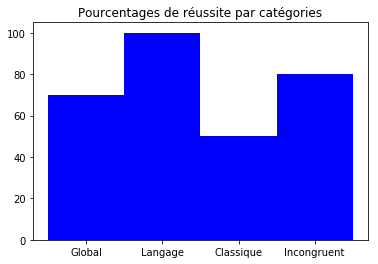

In [12]:
pourcentage_reussite=[]
pourcentage_reussite_eleve= open("poids_initiaux.txt", "w")

for categorie in range(len(scores)):
    pourcentage_cat = scores[categorie]/nb_exo_par_cat[categorie]*100
    pourcentage_reussite.append(pourcentage_cat)

les_poids=[str(pourcentage_reussite[0])+"\t",
           str(pourcentage_reussite[1])+"\t",
           str(pourcentage_reussite[2])+"\t",
           str(pourcentage_reussite[3])]
pourcentage_reussite_eleve.writelines(les_poids)

pourcentage_reussite_eleve.close()

items=['Global','Langage','Classique','Incongruent']

b3=plt.bar(items, pourcentage_reussite, width, color='b' )

plt.title("Pourcentages de réussite par catégories")
#plt.savefig('Resultat_eleve.png')


Ce sont ces pourcentages que j'enregistre et qui seront utilisés dans mon dernier script